In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

titles = open('cut_21.csv', 'r', encoding='utf-8', errors='ignore').read().split('\n')
#print(str(len(titles)) + ' запросов считано')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def token_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    return filtered_tokens

#Создаем словари (массивы) из полученных основ
totalvocab_stem = []
totalvocab_token = []
for i in titles:
    allwords_stemmed = token_and_stem(i)
    #print(allwords_stemmed)
    totalvocab_stem.extend(allwords_stemmed)
    
    allwords_tokenized = token_only(i)
    totalvocab_token.extend(allwords_tokenized)
    
titles = open('cut_20.csv', 'r', encoding='utf-8', errors='ignore').read().split('\n')
for i in titles:
    allwords_stemmed = token_and_stem(i)
    #print(allwords_stemmed)
    totalvocab_stem.extend(allwords_stemmed)
    
    allwords_tokenized = token_only(i)
    totalvocab_token.extend(allwords_tokenized)

titles = open('cut_19.csv', 'r', encoding='utf-8', errors='ignore').read().split('\n')
for i in titles:
    allwords_stemmed = token_and_stem(i)
    #print(allwords_stemmed)
    totalvocab_stem.extend(allwords_stemmed)
    
    allwords_tokenized = token_only(i)
    totalvocab_token.extend(allwords_tokenized)
    
titles = open('18_age.csv', 'r', encoding='utf-8', errors='ignore').read().split('\n')
for i in titles:
    allwords_stemmed = token_and_stem(i)
    #print(allwords_stemmed)
    totalvocab_stem.extend(allwords_stemmed)
    
    allwords_tokenized = token_only(i)
    totalvocab_token.extend(allwords_tokenized)

titles = open('17_age.csv', 'r', encoding='utf-8', errors='ignore').read().split('\n')
for i in titles:
    allwords_stemmed = token_and_stem(i)
    #print(allwords_stemmed)
    totalvocab_stem.extend(allwords_stemmed)
    
    allwords_tokenized = token_only(i)
    totalvocab_token.extend(allwords_tokenized)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

n_featur=200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01,
                                 use_idf=True, tokenizer=token_and_stem, ngram_range=(1,3))
get_ipython().magic('time tfidf_matrix = tfidf_vectorizer.fit_transform(titles)')
print(tfidf_matrix.shape)

CPU times: user 989 ms, sys: 17.4 ms, total: 1.01 s
Wall time: 1.01 s
(125, 1588)


In [4]:
num_clusters = 5

# Метод к-средних - KMeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters)
get_ipython().magic('time km.fit(tfidf_matrix)')
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

print(clusters)
print (km.labels_)

# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

mbk  = MiniBatchKMeans(init='random', n_clusters=num_clusters) #(init='k-means++', ‘random’ or an ndarray)
mbk.fit_transform(tfidf_matrix)
%time mbk.fit(tfidf_matrix)
miniclusters = mbk.labels_.tolist()
print (mbk.labels_)


# DBSCAN
from sklearn.cluster import DBSCAN
get_ipython().magic('time db = DBSCAN(eps=0.3, min_samples=10).fit(tfidf_matrix)')
labels = db.labels_
labels.shape
print(labels)

# Аггломеративная класстеризация
from sklearn.cluster import AgglomerativeClustering

agglo1 = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean') #affinity можно выбрать любое или попробовать все по очереди: cosine, l1, l2, manhattan
get_ipython().magic('time answer = agglo1.fit_predict(tfidf_matrix.toarray())')
answer.shape

CPU times: user 56 ms, sys: 1.01 ms, total: 57 ms
Wall time: 57.2 ms
[4, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 3, 3, 4, 3, 0, 3, 3, 3, 0, 3, 0, 3, 4, 0, 3, 4, 4, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 0, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 4]
[4 0 0 0 0 4 0 0 3 0 0 3 3 4 3 0 3 3 3 0 3 0 3 4 0 3 4 4 3 3 0 0 3 3 3 3 3
 3 4 4 0 4 4 4 3 3 4 4 4 4 3 4 4 4 4 3 3 4 4 1 2 1 2 1 2 2 2 2 2 1 1 1 2 2
 2 1 1 1 1 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 2
 2 1 1 1 1 1 1 1 2 2 2 2 1 4]
CPU times: user 18 ms, sys: 374 µs, total: 18.4 ms
Wall time: 18.4 ms
[3 4 4 4 4 3 4 4 3 3 4 4 3 3 4 4 3 3 3 4 3 4 3 3 4 3 3 3 3 3 4 4 4 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0
 0 0 0 0 0 0 0 1 0 0 0 0 2 0 2 0 2 0 0 0 0 2 0 2 1 0 0 0 2 2 0 2 0 2 0 0 0
 0 2 

(125,)

In [9]:
#k-means
clusterkm = km.labels_.tolist()
#minikmeans
clustermbk = mbk.labels_.tolist()
#dbscan
clusters3 = labels
 #agglo
#clusters4 = answer.tolist()

frame = pd.DataFrame(titles, index = [clusterkm])

#k-means
out = { 'title': titles, 'cluster': clusterkm }
frame1 = pd.DataFrame(out, index = [clusterkm], columns = ['title', 'cluster'])

#mini
out = { 'title': titles, 'cluster': clustermbk }
frame_minik = pd.DataFrame(out, index = [clustermbk], columns = ['title', 'cluster'])

frame1['cluster'].value_counts()
frame_minik['cluster'].value_counts()

0    40
4    33
2    32
1    13
3     7
Name: cluster, dtype: int64

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist.shape


(125, 125)

In [5]:
# Метод главных компонент - PCA

from sklearn.decomposition import IncrementalPCA
icpa = IncrementalPCA(n_components=2, batch_size=16)
get_ipython().magic('time icpa.fit(dist) #demo =')
get_ipython().magic('time demo2 = icpa.transform(dist)')
xs, ys = demo2[:, 0], demo2[:, 1]

# PCA 3D
from sklearn.decomposition import IncrementalPCA
icpa = IncrementalPCA(n_components=3, batch_size=16)
get_ipython().magic('time icpa.fit(dist) #demo =')
get_ipython().magic('time ddd = icpa.transform(dist)')
xs, ys, zs = ddd[:, 0], ddd[:, 1], ddd[:, 2]

#Можно сразу примерно посмотреть, что получится в итоге
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs, ys, zs)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#plt.show()

NameError: name 'dist' is not defined

NameError: name 'dist' is not defined

NameError: name 'demo2' is not defined

In [6]:
from matplotlib import rc
#включаем русские символы на графике
font = {'family' : 'Verdana'}#, 'weigth': 'normal'}
rc('font', **font)

#можно сгенерировать цвета для кластеров
import random
def generate_colors(n):
    color_list = []
    for c in range(0,n):
        r = lambda: random.randint(0,255)
        color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
    return color_list

#устанавливаем цвета
cluster_colors = {0: 'green', 1: 'yellow', 2: 'red',  3: 'purple', 4: 'blue',}
#даем имена кластерам, но из-за рандома пусть будут просто 01234
cluster_names = {0: '0',  1: '1', 2: '2',  3: '3', 4: '4',}
#matplotlib inline

#создаем data frame, который содержит координаты (из PCA) + номера кластеров и сами запросы
df = pd.DataFrame(dict(x=xs, y=ys, label=clusterkm, title=titles)) 
#группируем по кластерам
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(72, 36)) #figsize подбирается под ваш вкус

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(        axis= 'y',         
        which='both',     
        left='off',      
        top='off',       
        labelleft='off')
    
ax.legend(numpoints=1)  #показать легенду только 1 точки

#добавляем метки/названия в х,у позиции с поисковым запросом
#for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=6)  

#показать график
plt.show() 
plt.close()

NameError: name 'xs' is not defined

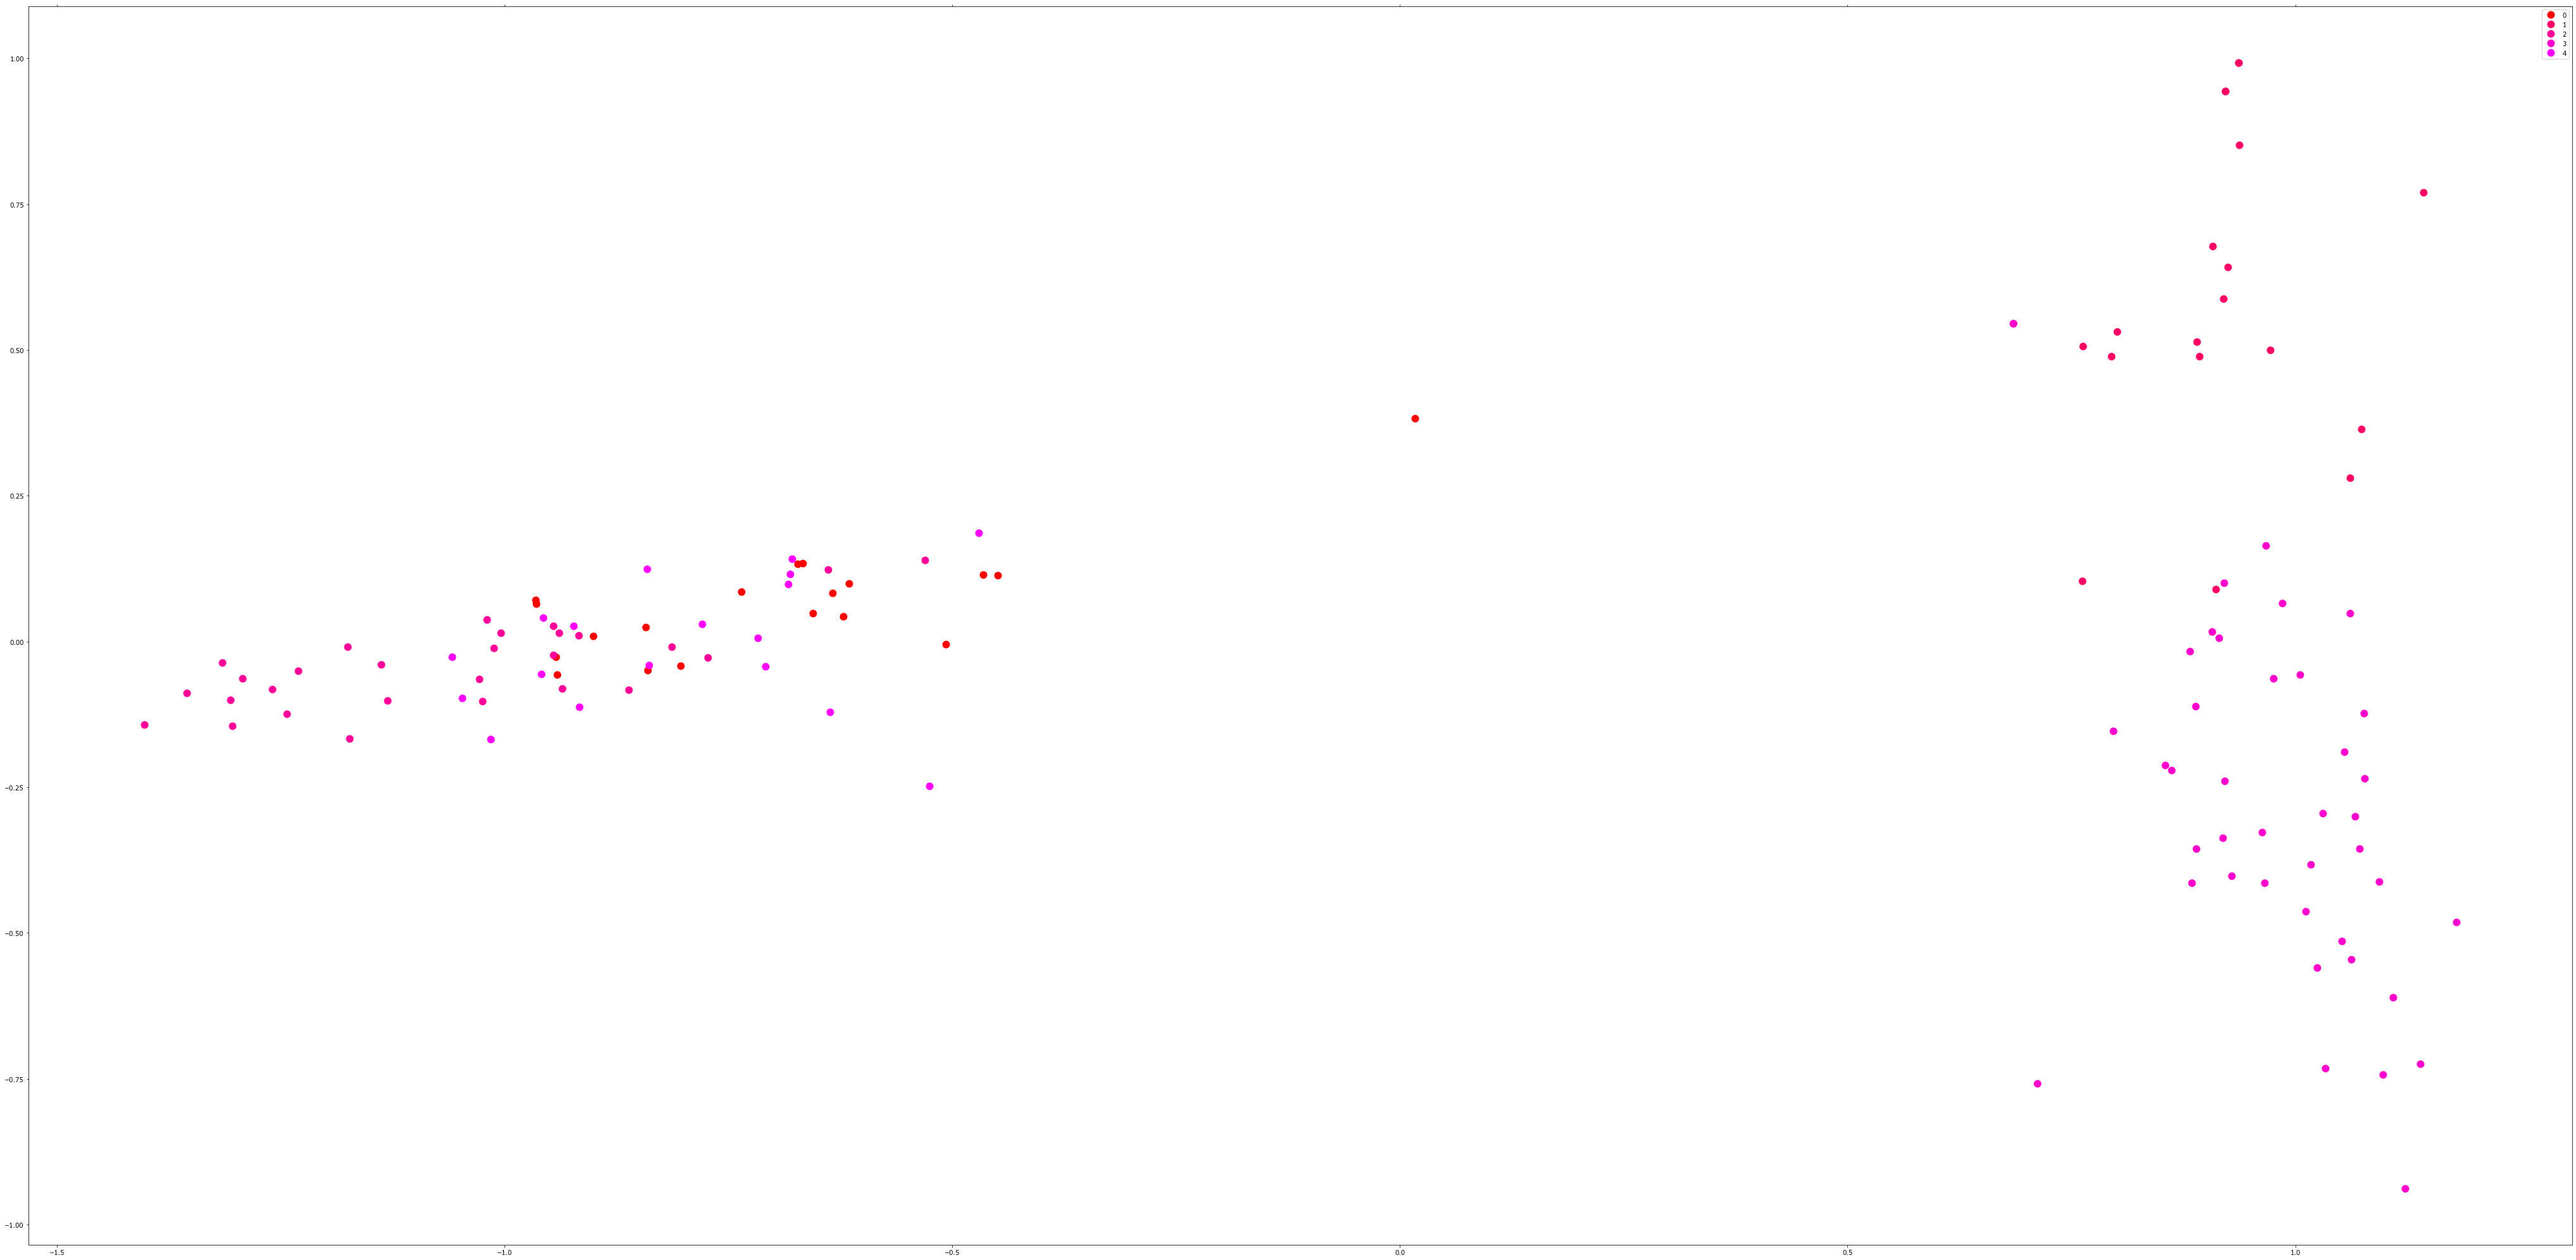

In [19]:
from matplotlib import rc
#включаем русские символы на графике
font = {'family' : 'Verdana'}#, 'weigth': 'normal'}
rc('font', **font)

#можно сгенерировать цвета для кластеров
import random
def generate_colors(n):
    color_list = []
    for c in range(0,n):
        r = lambda: random.randint(0,255)
        color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
    return color_list

#устанавливаем цвета
cluster_colors = {0: '#ff0000', 1: '#ff0066', 2: '#ff0099',  3: '#ff00cc', 4: '#ff00ff',}
#даем имена кластерам, но из-за рандома пусть будут просто 01234
cluster_names = {0: '0',  1: '1', 2: '2',  3: '3', 4: '4',}
#matplotlib inline

#создаем data frame, который содержит координаты (из PCA) + номера кластеров и сами запросы
df = pd.DataFrame(dict(x=xs, y=ys, label=clusterkm, title=titles)) 
#группируем по кластерам
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(72, 36)) #figsize подбирается под ваш вкус

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(        axis= 'y',         
        which='both',     
        left='off',      
        top='off',       
        labelleft='off')
    
ax.legend(numpoints=1)  #показать легенду только 1 точки

#добавляем метки/названия в х,у позиции с поисковым запросом
#for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=6)  

#показать график
plt.show() 
plt.close()

In [7]:
# Plot 
fig, ax = plt.subplots(figsize=(25,27)) 
ax.margins(0.03)


for name, group in groups_mbk:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, #ms=18
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels, voffset=10, hoffset=10, #css=css)
    mpld3.plugins.connect(fig, tooltip) #   , TopToolbar()
    
#     ax.axes.get_xaxis().set_ticks([])
#     ax.axes.get_yaxis().set_ticks([])

#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)

# ax.set_title("Mini K-Means", size=20) #groups_mbk
    
# ax.legend(numpoints=1)
# mpld3.disable_notebook()
#mpld3.display()
# mpld3.save_html(fig, "mbk.html")

# mpld3.show()
#mpld3.save_json(fig, "vivod.json")
#mpld3.fig_to_html(fig)

fig, ax = plt.subplots(figsize=(51,25))

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')    

ax.set_title("Кластеры", size=20)

fig, ax = plt.subplots(figsize=(51,25))

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.show()fig, ax = plt.subplots(figsize=(72,36))
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    tooltip = mpld3.plugins.PointLabelTooltip(points, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

ax.set_title("K-means", size=20)

mpld3.display()

SyntaxError: invalid syntax (<ipython-input-7-ae924f833138>, line 33)

In [8]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',
    which='both', 
    bottom='off',
    top='off',
    labelbottom='off')

plt.tight_layout() 

#сохраним рисунок
plt.savefig('ward_clusters2.png', dpi=200)

NameError: name 'dist' is not defined

SyntaxError: invalid syntax (<ipython-input-18-1a0775922923>, line 1)